<a href="https://colab.research.google.com/github/myller-silva/explications-anns-colab/blob/main/Plotagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [298]:
import ast
import numpy as np
import pandas as pd
import tensorflow as tf
from typing import List, Tuple
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
import matplotlib.patches as patches

In [299]:
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/My Drive/explications-anns'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [300]:
datasets_path = f'{base_path}/datasets'
results_path = f'{datasets_path}/digits/results'

In [301]:
def read_dataset(dir_path:str, model_h5_file:str):
  data_test = pd.read_csv(f"{dir_path}/test.csv")
  data_train = pd.read_csv(f"{dir_path}/train.csv")
  data = data_train._append(data_test)

  model_h5 = tf.keras.models.load_model(f"{dir_path}/{model_h5_file}")
  return (data, model_h5)

In [302]:
model_h5_file = 'models/model_3layers_20neurons.h5'
(data, model_h5) = read_dataset(f'{datasets_path}/digits', model_h5_file)

In [303]:
result_df = pd.read_csv(f'{results_path}/{model_h5_file}/df.csv')
len(result_df)

763

In [304]:
result_df

,instance_index,tempo_original,tempo_relaxado,tempo_relaxado_global,len_original,len_relaxado,len_relaxado_global,delta,explanation,explanation_relaxed,explanation_relaxed_global
0,15,65.539202,0.681427,0.678472,48.0,0,0,1.0,"[(1, 0), (1, 2), (1, 4), (1, 5), (1, 7), (2, 0...",[],[]
1,16,45.637076,0.701549,0.722697,47.0,0,0,1.0,"[(0, 1), (0, 3), (0, 5), (0, 6), (0, 7), (1, 2...",[],[]
2,17,248.772992,0.891559,0.689128,48.0,0,0,1.0,"[(0, 6), (1, 0), (1, 2), (1, 3), (1, 6), (2, 0...",[],[]
3,0,NaN,1.259570,1.089936,NaN,32,41,0.1,NaN,"[(2, 2), (2, 3), (2, 5), (3, 1), (3, 2), (3, 3...","[(0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4..."
4,1,NaN,0.679395,0.673765,NaN,64,64,0.1,NaN,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...","[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5..."
...,...,...,...,...,...,...,...,...,...,...,...
758,55,186.941200,1.536820,2.325633,41.0,24,29,0.4,"[(1, 1), (1, 2), (1, 3), (1, 5), (1, 6), (2, 3...","[(4, 1), (4, 2), (4, 4), (4, 5), (4, 6), (5, 1...","[(3, 2), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3..."
759,56,367.278784,1.211868,0.863074,43.0,64,64,0.4,"[(0, 3), (0, 5), (0, 6), (0, 7), (1, 1), (1, 2...","[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...","[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5..."
760,57,61.588325,1.220584,1.145005,44.0,24,34,0.4,"[(0, 5), (0, 6), (1, 1), (1, 2), (1, 4), (1, 6...","[(2, 5), (3, 4), (3, 5), (4, 1), (4, 2), (4, 4...","[(1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1..."
761,58,487.175857,0.716563,0.737249,46.0,64,64,0.4,"[(0, 4), (1, 0), (1, 2), (1, 4), (1, 5), (1, 6...","[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...","[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5..."


In [305]:
# result_df = result_df[(result_df["len_relaxado"] != 64) | (result_df["len_relaxado_global"] != 64)]
# result_df[10:15]

In [306]:
len(result_df.query("len_original>0"))

63

In [307]:
len(result_df.query("len_relaxado < len_relaxado_global"))

352

In [308]:
len(result_df.query("len_relaxado > len_relaxado_global"))

26

In [309]:
len(result_df.query("delta==0.1 and len_relaxado == 64"))

235

In [310]:
result_df = result_df.query("len_original > 0")

In [311]:
result_df

,instance_index,tempo_original,tempo_relaxado,tempo_relaxado_global,len_original,len_relaxado,len_relaxado_global,delta,explanation,explanation_relaxed,explanation_relaxed_global
0,15,65.539202,0.681427,0.678472,48.0,0,0,1.0,"[(1, 0), (1, 2), (1, 4), (1, 5), (1, 7), (2, 0...",[],[]
1,16,45.637076,0.701549,0.722697,47.0,0,0,1.0,"[(0, 1), (0, 3), (0, 5), (0, 6), (0, 7), (1, 2...",[],[]
2,17,248.772992,0.891559,0.689128,48.0,0,0,1.0,"[(0, 6), (1, 0), (1, 2), (1, 3), (1, 6), (2, 0...",[],[]
703,0,73.717082,1.069560,1.178486,47.0,38,41,0.4,"[(0, 5), (0, 7), (1, 0), (1, 3), (1, 4), (1, 7...","[(0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5...","[(0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4..."
704,1,103.461239,1.113295,0.756503,48.0,64,64,0.4,"[(0, 4), (0, 5), (0, 6), (1, 2), (1, 3), (1, 4...","[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...","[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5..."
...,...,...,...,...,...,...,...,...,...,...,...
758,55,186.941200,1.536820,2.325633,41.0,24,29,0.4,"[(1, 1), (1, 2), (1, 3), (1, 5), (1, 6), (2, 3...","[(4, 1), (4, 2), (4, 4), (4, 5), (4, 6), (5, 1...","[(3, 2), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3..."
759,56,367.278784,1.211868,0.863074,43.0,64,64,0.4,"[(0, 3), (0, 5), (0, 6), (0, 7), (1, 1), (1, 2...","[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...","[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5..."
760,57,61.588325,1.220584,1.145005,44.0,24,34,0.4,"[(0, 5), (0, 6), (1, 1), (1, 2), (1, 4), (1, 6...","[(2, 5), (3, 4), (3, 5), (4, 1), (4, 2), (4, 4...","[(1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1..."
761,58,487.175857,0.716563,0.737249,46.0,64,64,0.4,"[(0, 4), (1, 0), (1, 2), (1, 4), (1, 5), (1, 6...","[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...","[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5..."


In [312]:
# @title string_to_list
def string_to_list(string):
    return ast.literal_eval(string)

In [313]:
# @title not_in_explanation
def not_in_explanation(explanation: List[Tuple[int, int]], dimension: Tuple[int, int] = (8, 8)):
  x, y = dimension
  array = []
  for i in range(x):
    for j in range(y):
      if (i, j) not in explanation:
        array.append((i, j))
  return array

In [314]:
# @title show_image_with_explanation
def show_image_with_explanation(ax, df: pd.DataFrame, instancia_index: int, explanation: list, explanation_name: str):
    instancia_values = df.iloc[instancia_index, :-1].values
    instancia = instancia_values.reshape(8, 8)

    ax.imshow(instancia, cmap="gray")

    target = df.iloc[instancia_index, -1]

    ax.text(0.5, -0.1, f"Target: {target}", fontsize=12, ha="center", transform=ax.transAxes )

    not_in_exp = not_in_explanation(explanation, (8, 8))
    for i, j in not_in_exp:
        rect = patches.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=1, edgecolor="r", facecolor="r", alpha=1)
        ax.add_patch(rect)

    # # Adicionar texto com o nome da explicação e quantidade de pixels
    # ax.text(0.5, 1.05,f"{explanation_name} ({len(explanation)} pixels)",fontsize=12,ha="center",transform=ax.transAxes)


In [315]:
result_df = result_df.query('delta==0.4 and (len_relaxado < 64 or len_relaxado_global < 64)')
result_df

,instance_index,tempo_original,tempo_relaxado,tempo_relaxado_global,len_original,len_relaxado,len_relaxado_global,delta,explanation,explanation_relaxed,explanation_relaxed_global
703,0,73.717082,1.069560,1.178486,47.0,38,41,0.4,"[(0, 5), (0, 7), (1, 0), (1, 3), (1, 4), (1, 7...","[(0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5...","[(0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4..."
705,2,136.528138,1.201528,1.572589,42.0,26,29,0.4,"[(1, 1), (1, 2), (1, 5), (1, 6), (1, 7), (2, 2...","[(1, 4), (1, 5), (2, 2), (2, 3), (2, 4), (3, 0...","[(1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3..."
709,6,7.865762,1.066774,1.109962,55.0,43,41,0.4,"[(0, 4), (0, 6), (0, 7), (1, 1), (1, 4), (1, 5...","[(0, 4), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6...","[(0, 3), (0, 4), (1, 3), (1, 4), (1, 5), (1, 6..."
710,7,134.583315,2.155110,1.641614,43.0,37,33,0.4,"[(0, 3), (0, 4), (0, 6), (1, 1), (1, 2), (1, 3...","[(1, 7), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6...","[(0, 7), (2, 3), (2, 5), (2, 6), (2, 7), (3, 0..."
711,8,14.871864,1.122055,1.103079,53.0,34,35,0.4,"[(0, 5), (0, 6), (0, 7), (1, 1), (1, 2), (1, 3...","[(0, 3), (0, 4), (1, 1), (1, 3), (1, 4), (1, 5...","[(0, 3), (0, 4), (1, 0), (1, 1), (1, 3), (1, 4..."
713,10,198.637023,1.078766,1.062466,45.0,38,39,0.4,"[(1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2...","[(0, 5), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5...","[(0, 4), (0, 5), (0, 7), (1, 0), (1, 1), (1, 2..."
715,12,318.611078,1.111606,1.118791,43.0,32,31,0.4,"[(0, 7), (1, 2), (1, 3), (1, 6), (1, 7), (2, 0...","[(0, 4), (0, 5), (1, 2), (1, 4), (1, 5), (2, 2...","[(0, 4), (0, 5), (1, 2), (1, 4), (1, 5), (2, 1..."
718,15,71.814924,1.919332,1.655302,48.0,42,42,0.4,"[(1, 0), (1, 2), (1, 4), (1, 5), (1, 7), (2, 0...","[(0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2...","[(0, 2), (0, 3), (0, 4), (0, 7), (1, 1), (1, 2..."
721,18,305.934253,1.232892,1.190957,44.0,40,34,0.4,"[(0, 4), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5...","[(1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3...","[(0, 4), (1, 1), (1, 3), (1, 4), (2, 2), (2, 3..."
722,19,102.755040,1.154696,1.151554,46.0,37,39,0.4,"[(0, 4), (1, 2), (1, 3), (1, 4), (1, 6), (1, 7...","[(0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5...","[(0, 3), (0, 4), (0, 5), (1, 0), (1, 3), (1, 4..."


In [316]:
minimo = 0
quantidade = len(result_df)
maximo = (minimo + quantidade) if (minimo + quantidade) < len(result_df) else len(result_df)


0


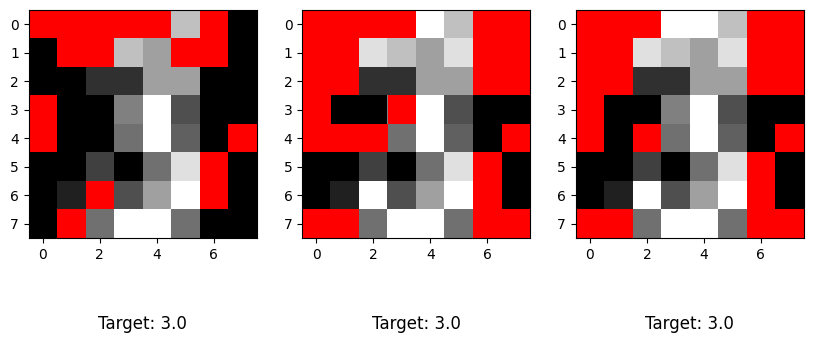

1


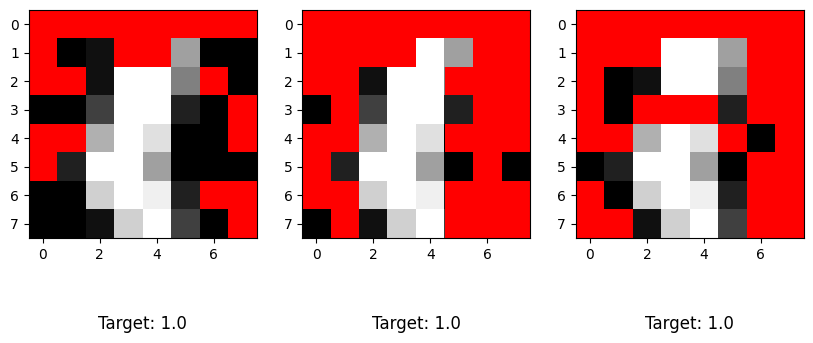

2


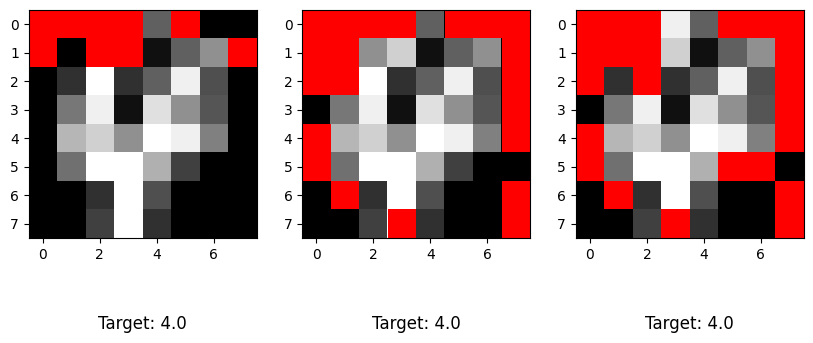

3


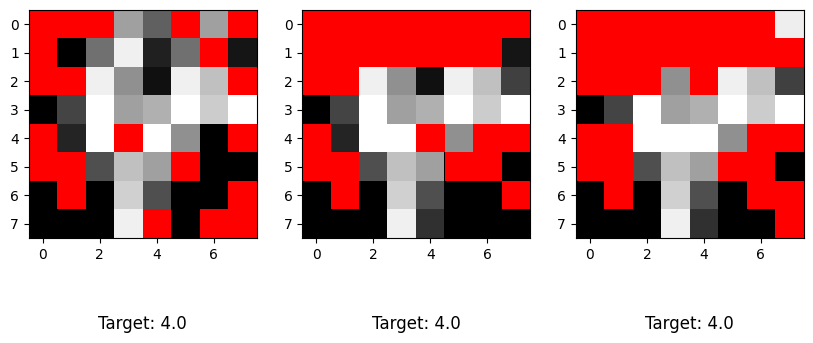

4


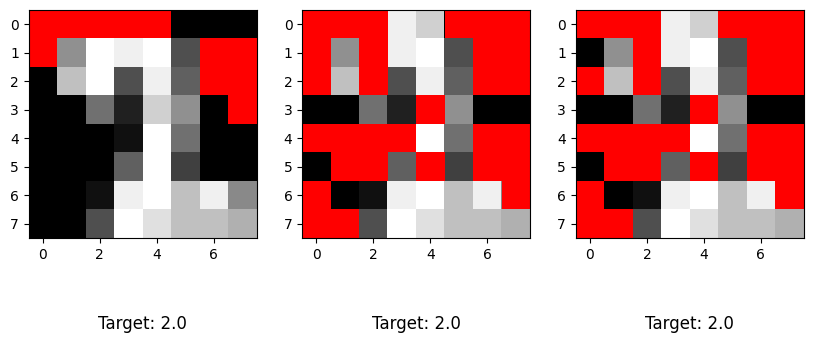

5


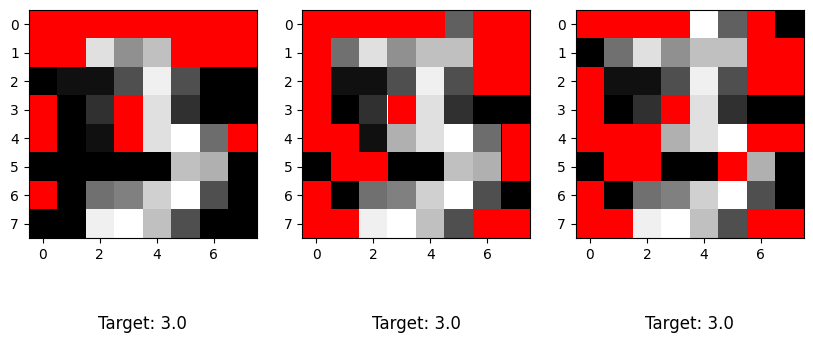

6


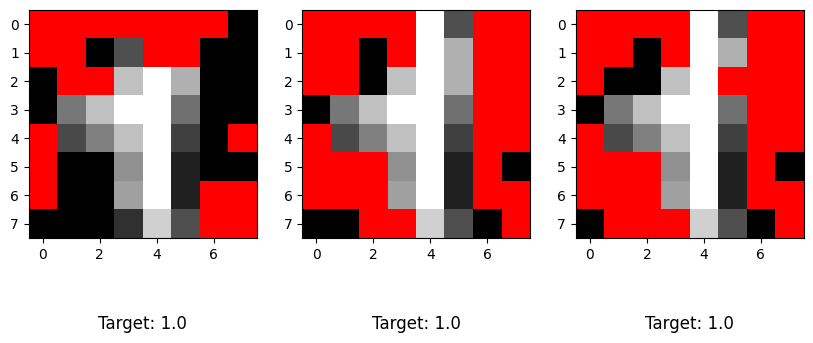

7


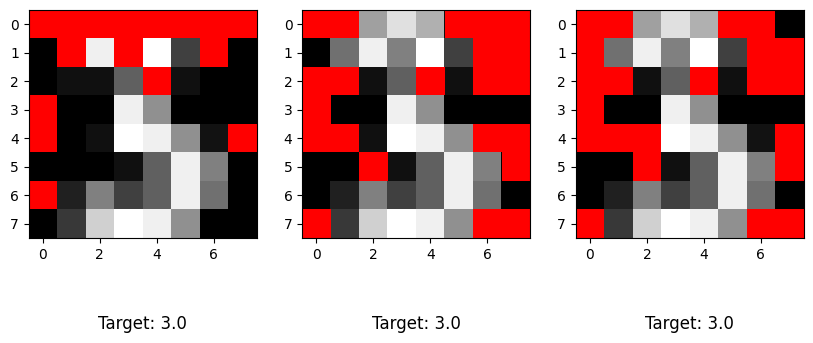

8


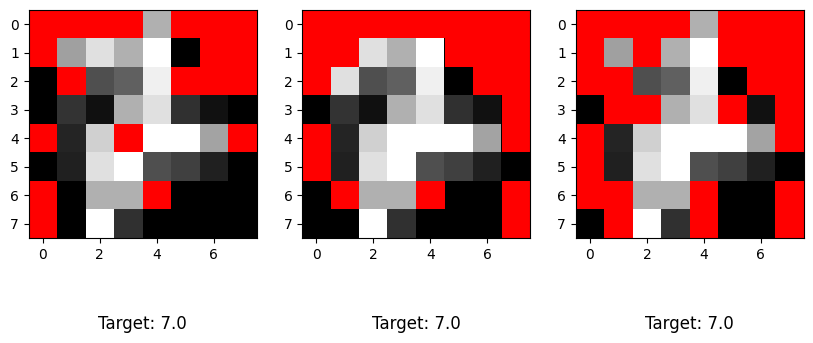

9


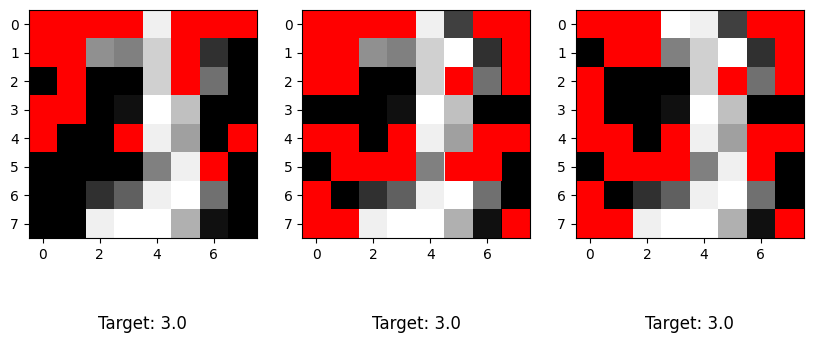

10


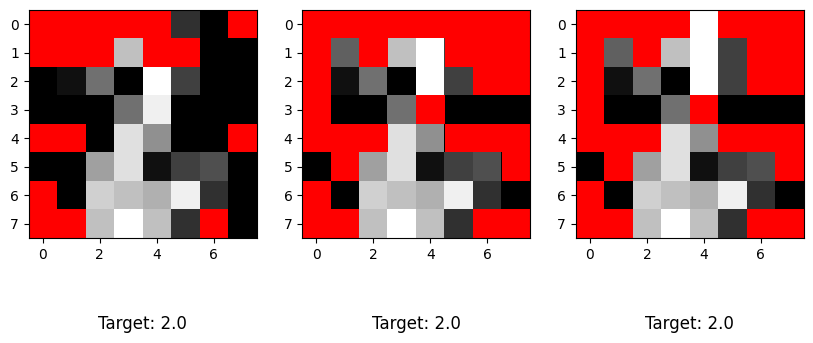

11


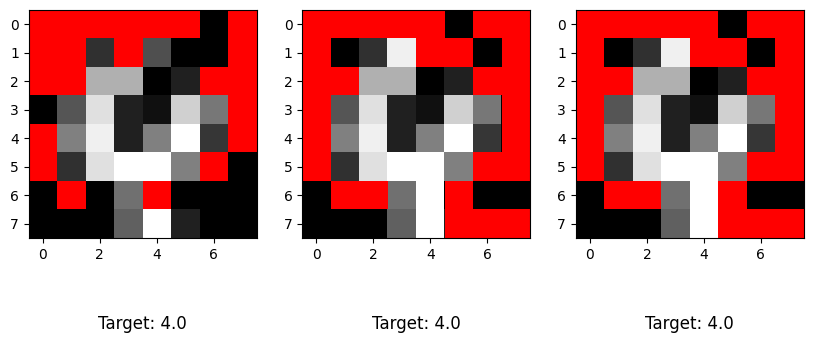

12


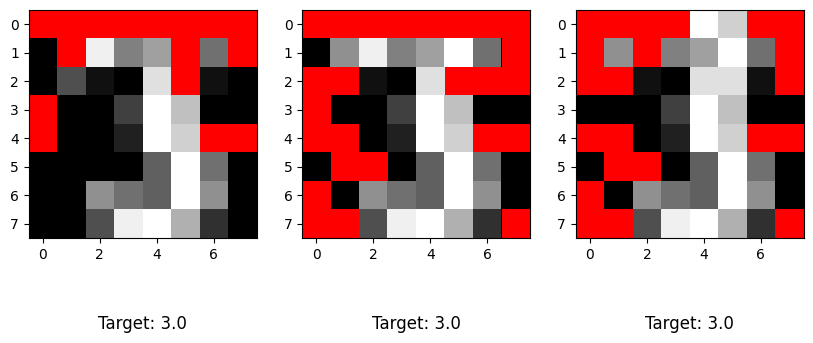

13


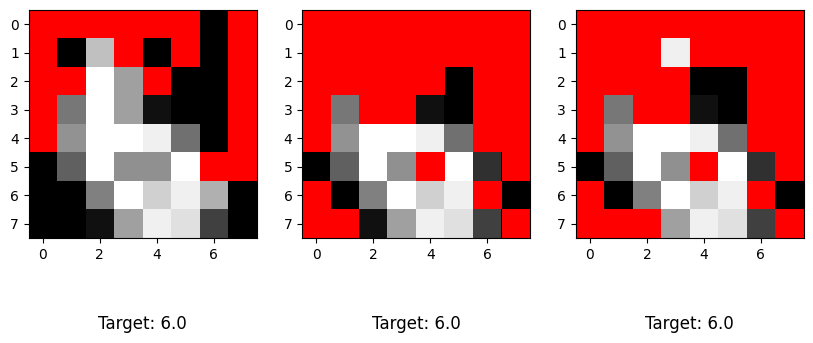

14


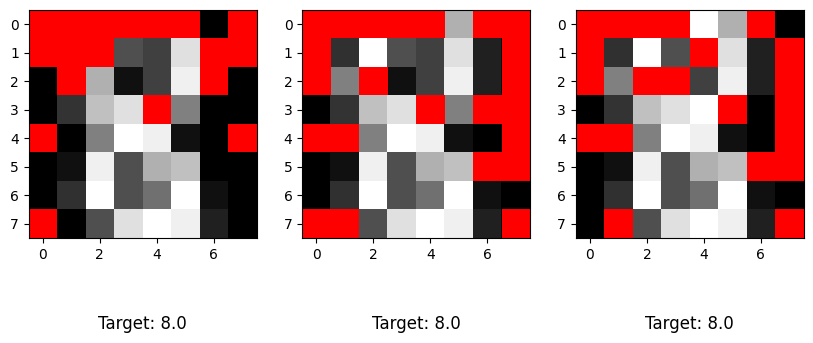

15


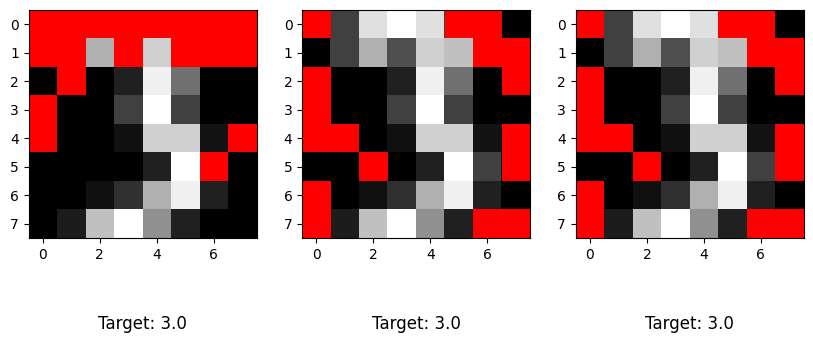

16


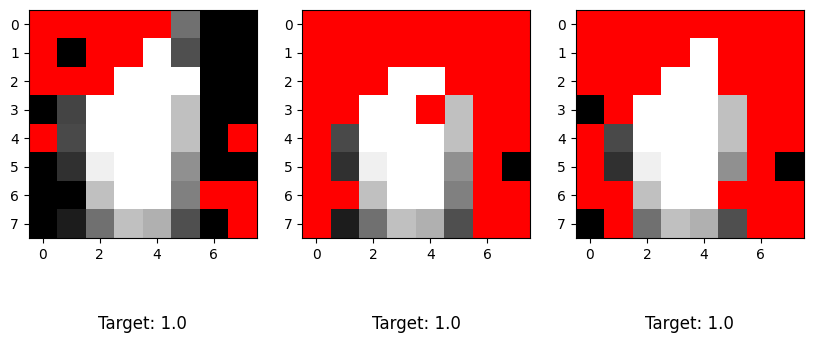

17


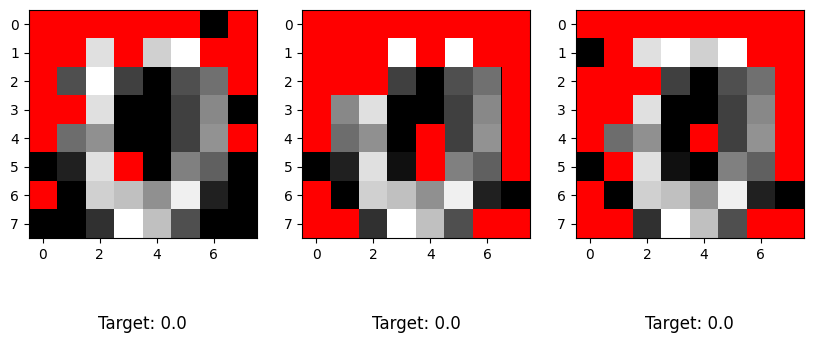

18


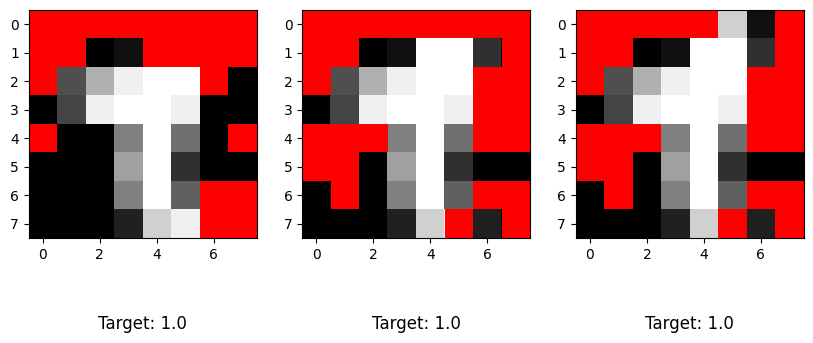

19


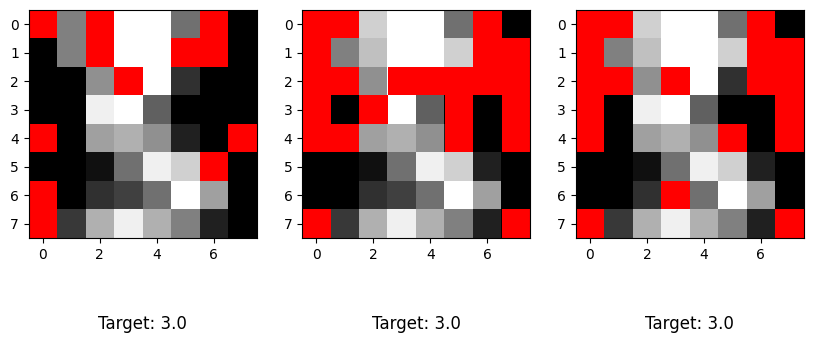

20


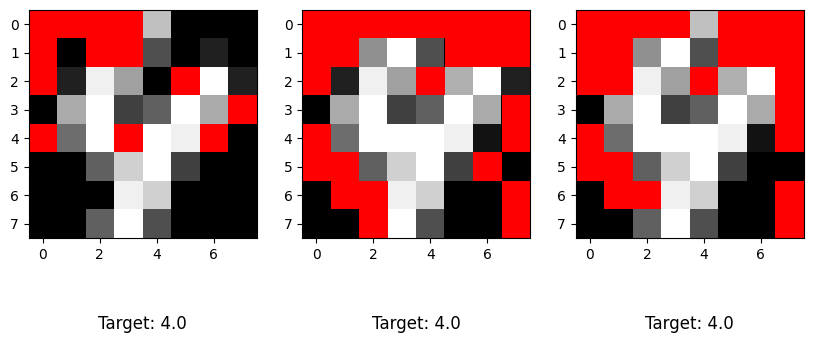

21


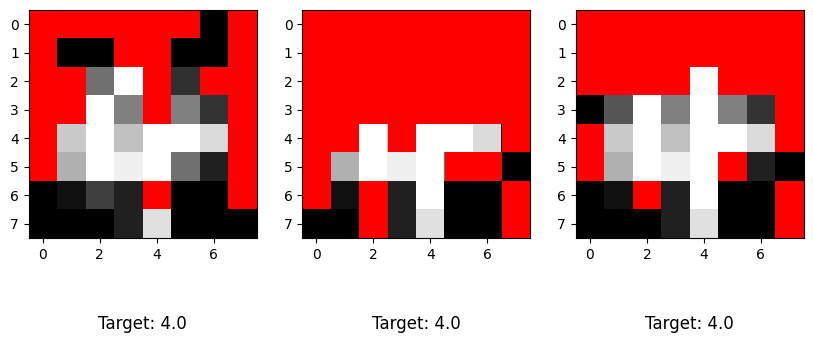

22


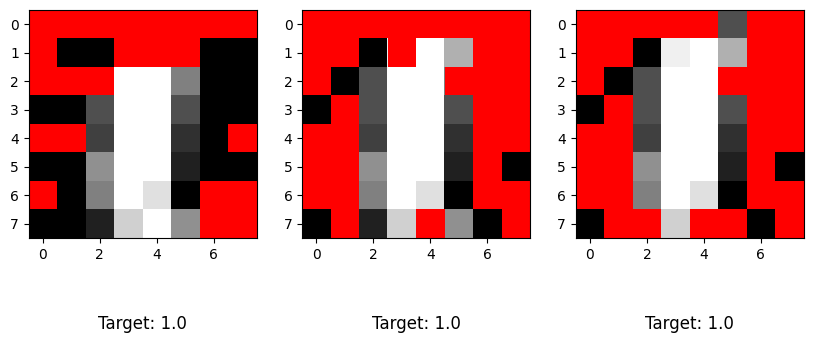

23


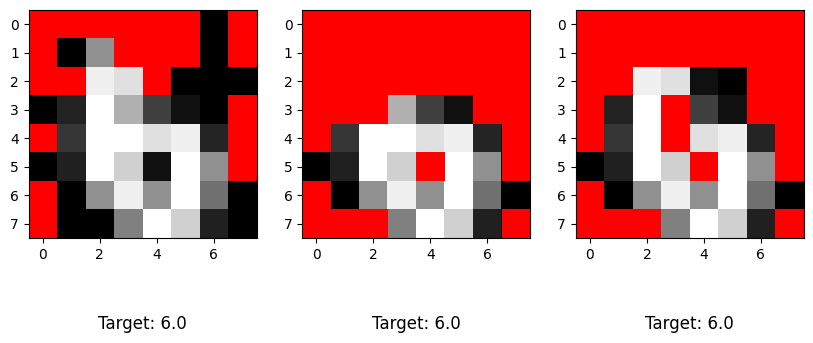

24


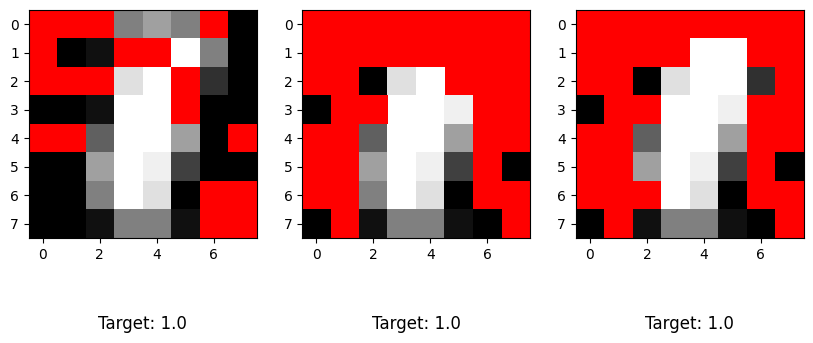

25


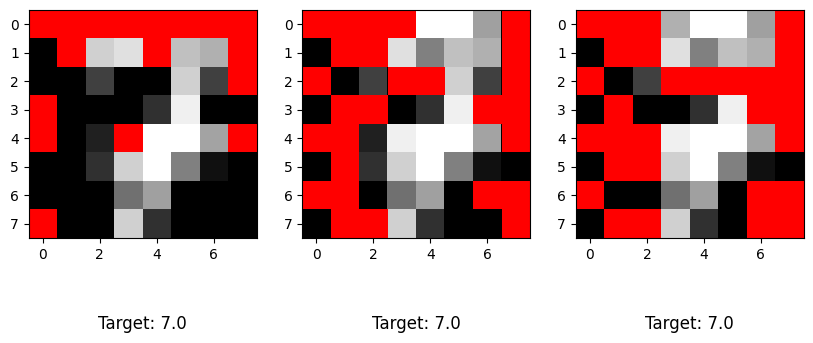

26


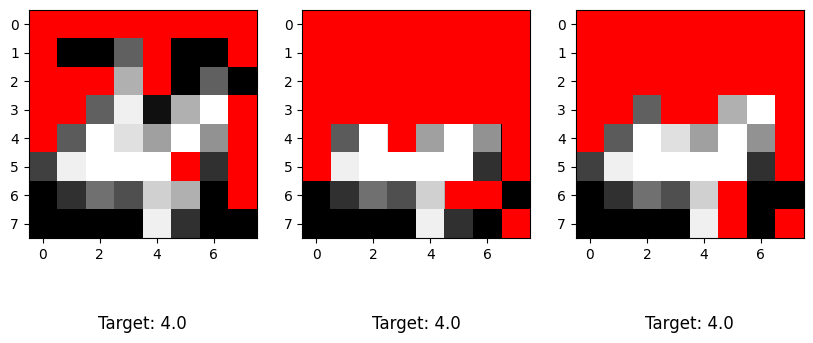

27


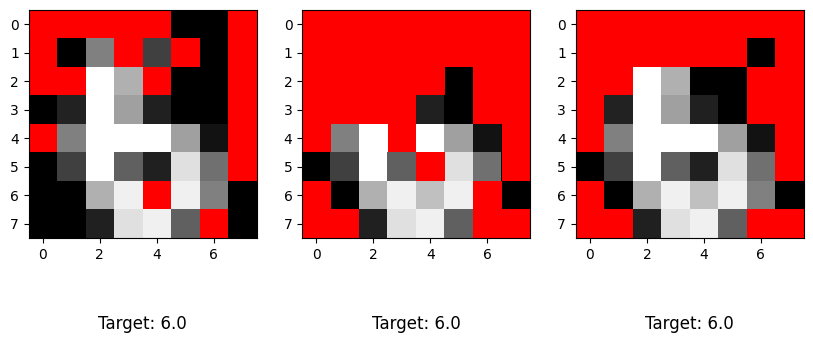

28


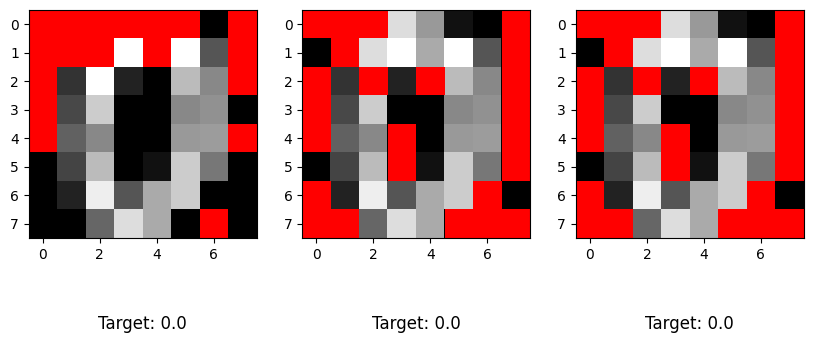

In [317]:
# @title PLotar Imagens
figsize=(10, 5)
for index in range(minimo, maximo):
    print(index)
    explanation_names = ["explanation", "explanation_relaxed", "explanation_relaxed_global"]
    labels = ["original", "relaxado local", "relaxado global"]
    fig, axs = plt.subplots(1, 3, figsize=figsize)
    for i, ax in enumerate(axs):
        explanation_name = explanation_names[i]
        label = labels[i]
        explanation_data = result_df.iloc[index][explanation_name]
        if pd.isna(explanation_data):
            ax.text(0.5, 0.5, "NAN", fontsize=12, ha="center")
            ax.axis('off')
        else:
          instancia_index  = result_df.iloc[index]["instance_index"]
          instancia_values = data.iloc[instancia_index, :-1].values
          imagem = instancia_values.reshape(8, 8)
          ax.imshow(imagem, cmap="gray")
          target = data.iloc[instancia_index, -1]
          ax.text(0.5, -0.4, f"Target: {target}", fontsize=12, ha="center", transform=ax.transAxes )
          not_in_exp = not_in_explanation(string_to_list(explanation_data), (8, 8))
          for i, j in not_in_exp:
              rect = patches.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=0.0, edgecolor="black", facecolor="r", alpha=1)
              ax.add_patch(rect)
    plt.show()


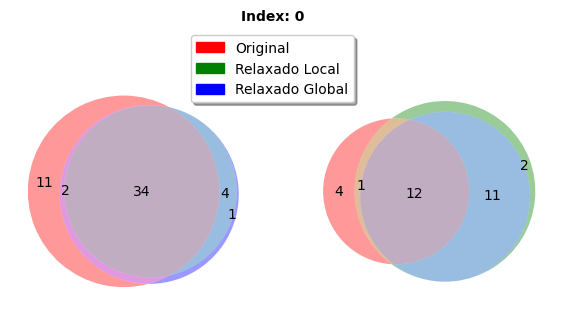

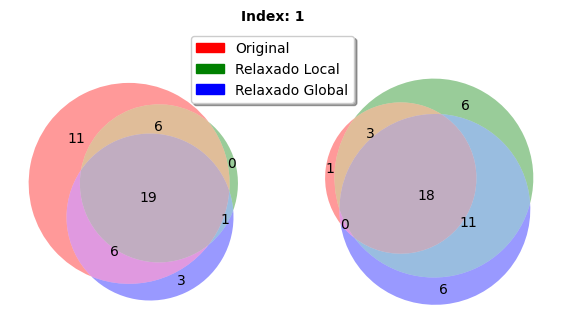

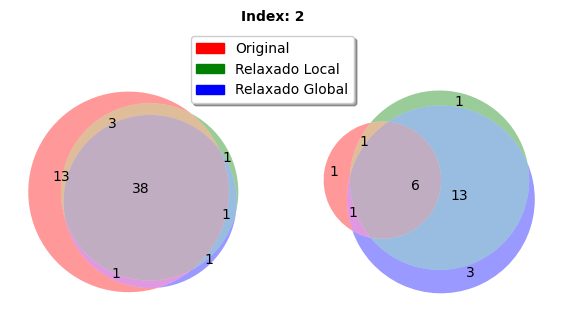

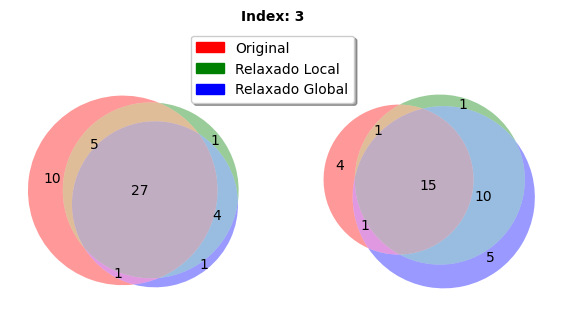

/usr/local/lib/python3.10/dist-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


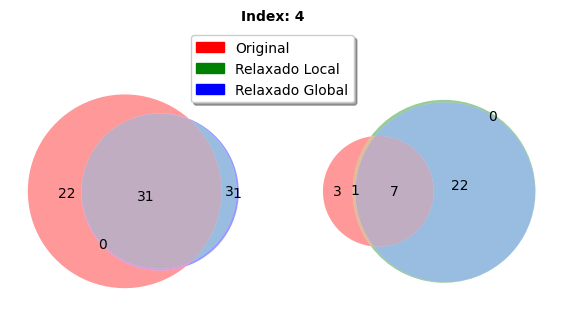

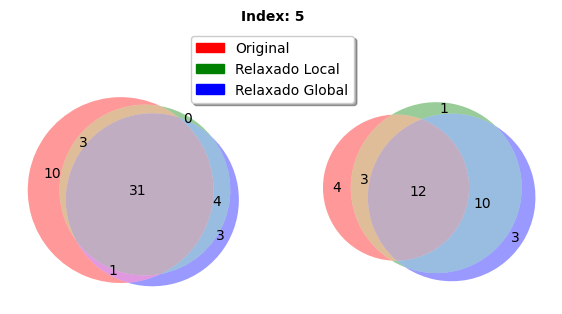

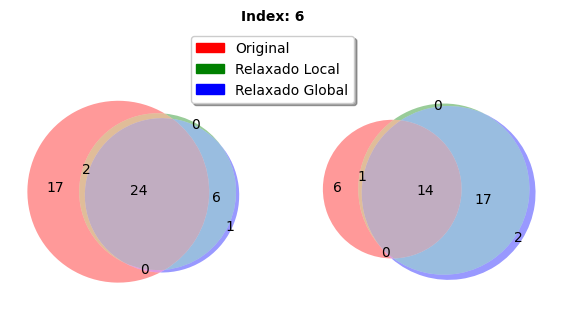

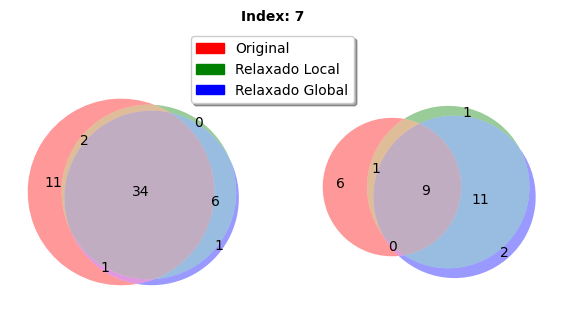

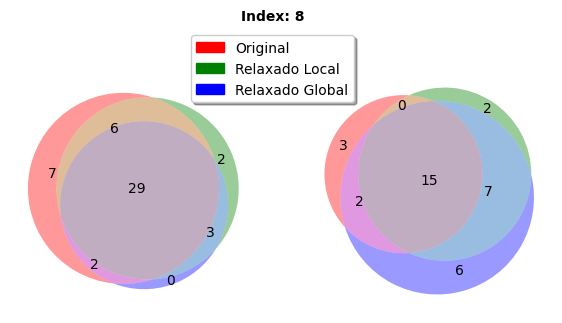

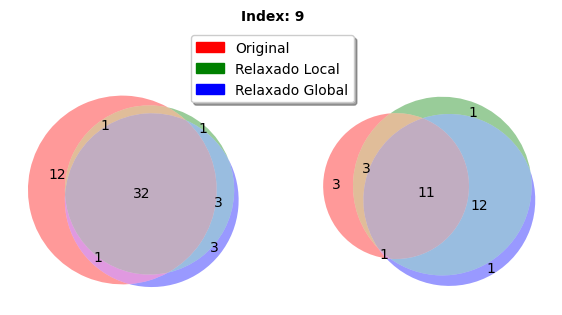

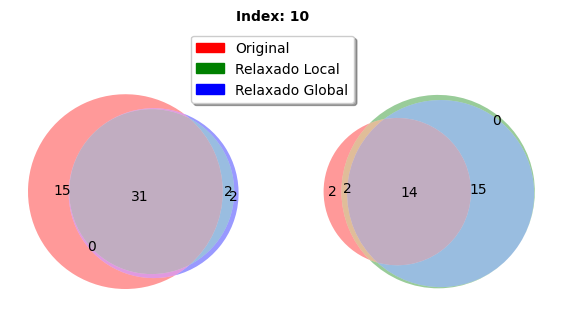

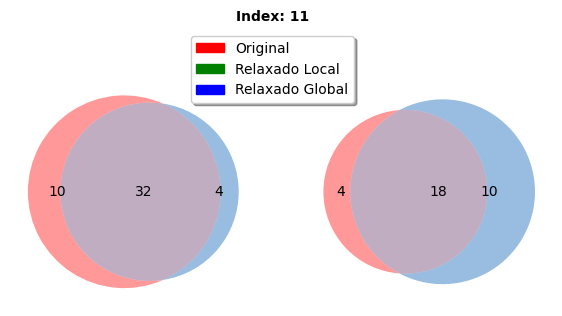

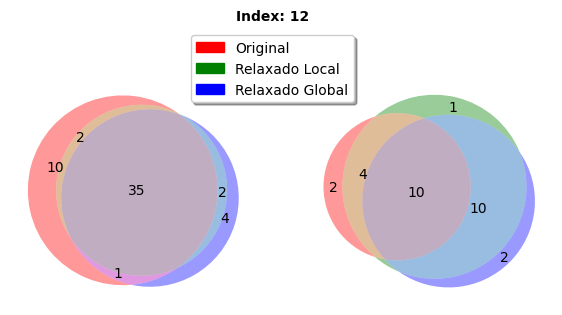

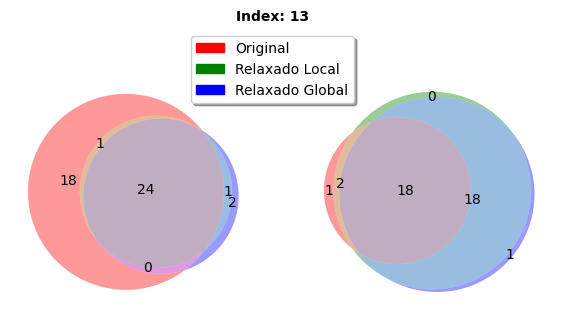

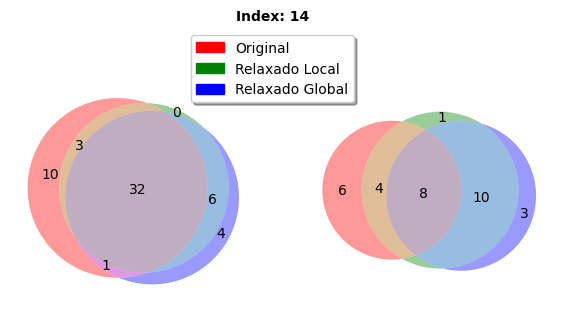

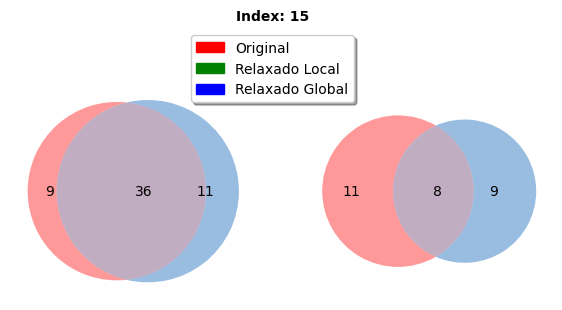

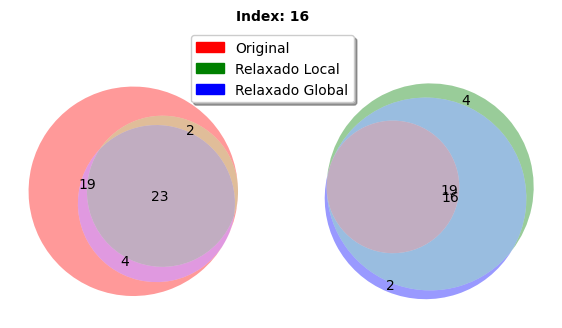

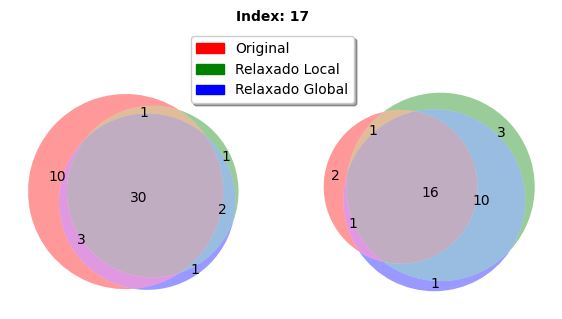

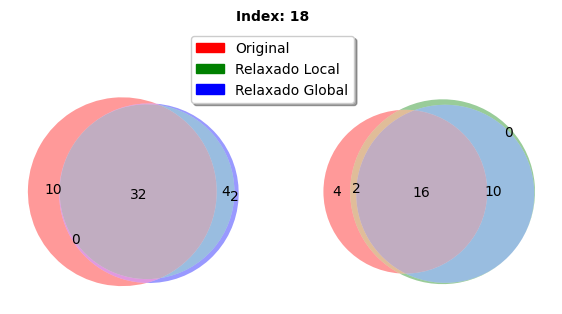

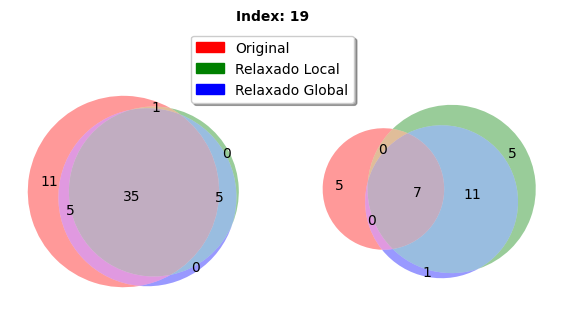

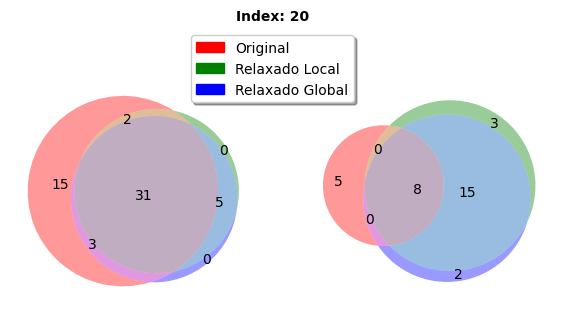

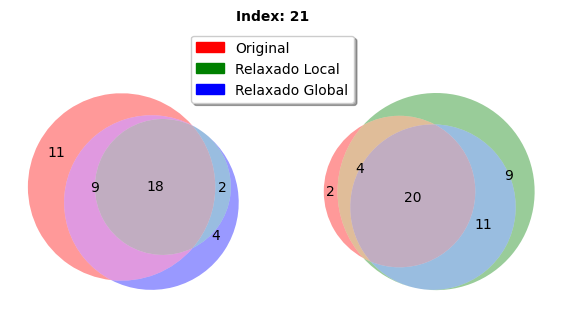

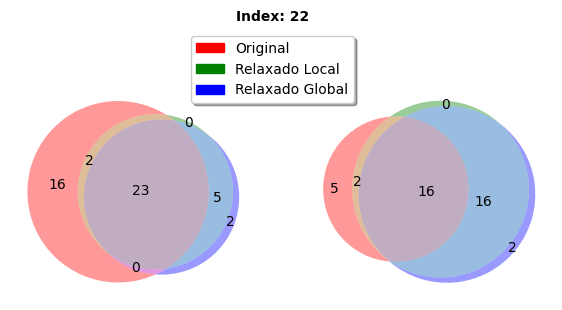

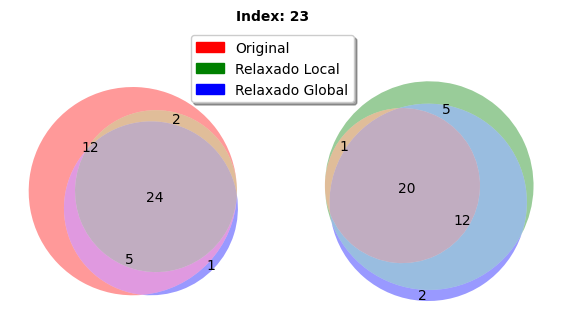

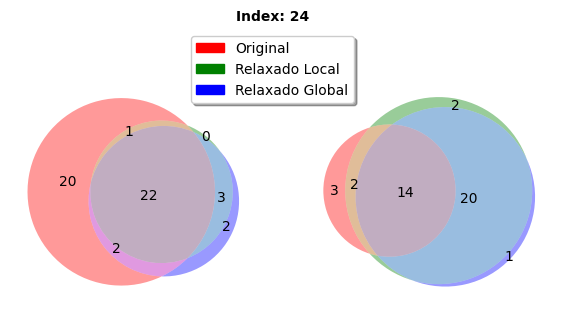

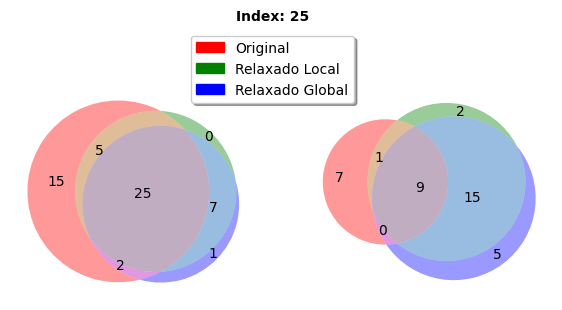

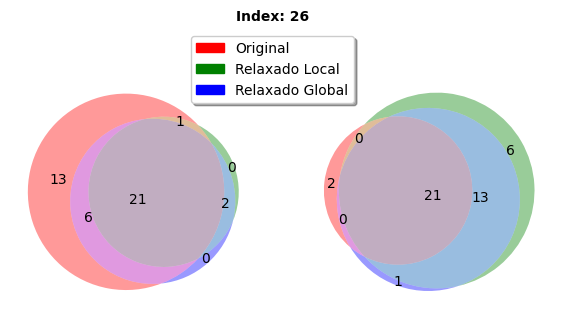

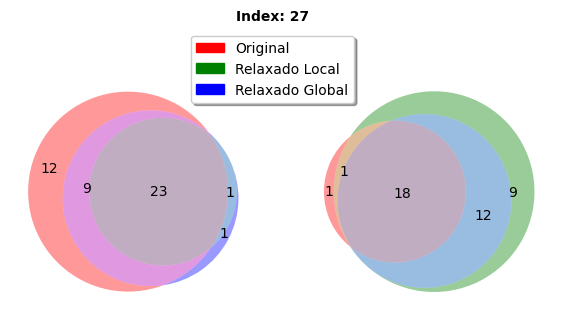

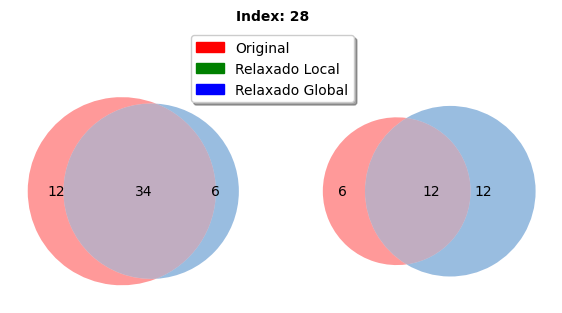

In [318]:
# @title Diagramas de Venn
figsize = (7, 4)
for index in range(minimo, maximo):
    explanation = result_df.iloc[index]["explanation"]
    explanation_relaxed = result_df.iloc[index]["explanation_relaxed"]
    explanation_relaxed_global = result_df.iloc[index]["explanation_relaxed_global"]

    subsets, subsets_notna, legends = [], [], []
    set_colors = []
    if pd.notna(explanation):
        exp = string_to_list(explanation)
        subsets.append(set(exp))
        subsets_notna.append(set(not_in_explanation(exp)))
        legends.append(patches.Patch(color='red', label='Original'))
        set_colors.append('red')

    if pd.notna(explanation_relaxed):
        exp = string_to_list(explanation_relaxed)
        subsets.append(set(exp))
        subsets_notna.append(set(not_in_explanation(exp)))
        legends.append(patches.Patch(color='green', label='Relaxado Local'))
        set_colors.append('green')

    if pd.notna(explanation_relaxed_global):
        exp = string_to_list(explanation_relaxed_global)
        subsets.append(set(exp))
        subsets_notna.append(set(not_in_explanation(exp)))
        legends.append(patches.Patch(color='blue', label='Relaxado Global'))
        set_colors.append('blue')

    fig, axs = plt.subplots(1, 2, figsize=figsize)
    # print(subsets)
    for i, ax in enumerate(axs):
        v = venn2 if len(subsets) == 2 else venn3
        if i == 0:
            v(subsets,None, set_colors=set_colors, ax=ax)
        else:
            v(subsets_notna, None, set_colors=set_colors, ax=ax)

    # Adicionar título ao gráfico
    fig.suptitle(f'Index: {index}', fontsize=10, fontweight='bold', y = 0.95)
    fig.legend(handles = legends, loc='lower center', bbox_to_anchor=(0.5, 0.7), fancybox=True, shadow=True, ncol=1)
    plt.show()
    print()
